In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import random 
from mpl_toolkits import mplot3d

# 2D version

In [201]:
FRAME_RATE = 24
# rounding to the number of decimal places below 
# TODO: Transformation based on industry standards later
RESOLUTION = 2

# Constants - let t range from 0 to 10 seconds
TIME_T = np.arange(0, 10, 1/FRAME_RATE)

# "variability" of the overall curve
K = 10

""" ================== START: Test Functions ================"""
def quadratic (t):
    return t**2

""" ================== END: Test Functions ================"""


""" ================== START: Function Definitions ================"""
def seqGen(a, b, method):
    """
    Input: Lower limit and higher limit (int)
    Output: List of length K with random values between low and high
    """
    if method == "normal":
        # mean, standard deviation, size
        return np.random.normal(a, b, K)
    elif method == "beta":
        # alpha, beta, size
        return np.random.beta(a, b, K)
    elif method == "gamma":
        # shape - skewness, scale - , size
        return np.random.gamma(a, b, K)
    elif method == "uniform":
        return np.random.uniform(a, b, K)

def genTrigFun(a_k, b_k):
    """
    Input: Two sequences of length K
    Output: Trig function f(t) with coefficients corresponding to sequences a_k, b_k
    """
    def fun_t (t):
        sum = 0
        for i in range(len(a_k)):
            sum += a_k[i]*np.sin(i*t) + b_k[i]*np.cos(i*t)
        return sum
    return (fun_t)

def speed(x_t, y_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the speed 
    """
    return np.sqrt(np.gradient(x_t)**2 + np.gradient(y_t)**2)
    
def curvature(x_t, y_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the curvature
    """
    # TODO: USE DETERMINANT TO SCALE UP EASIER
    
    num = abs(np.gradient(x_t)*np.gradient(np.gradient(y_t))
             - np.gradient(y_t)*np.gradient(np.gradient(x_t)))
    denom = speed(x_t, y_t) ** 3
    return (num/denom)

""" ================== END: Function Definitions ================"""
def genericPlotAgainstTime(f_t, x_t, y_t):
    plt.plot(TIME_T, f_t(x_t(TIME_T), y_t(TIME_T)))


""" ================== START: Plotting functions ================"""
def plotParametric (x_t, y_t):
    """ 
    Input: 2 functions of t, x(t) and y(t)
    Output: Plots x(t) against y(t). Does not return value.
    """
    plt.plot(x_t(TIME_T), y_t(TIME_T))
    
def plotAgainstTime (x_t):
    x_t(TIME_T)
    
def plotAll(a_k, b_k, c_k, d_k):

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    plt.subplot(221)

    plt.plot(np.arange(0,K, 1), a_k, 'r', label = "uniform")
    plt.plot(np.arange(0,K, 1), b_k, 'y', label = "beta")
    plt.plot(np.arange(0,K, 1), c_k, 'g', label = "gamma")
    plt.plot(np.arange(0,K, 1), d_k, 'b', label = "normal")
    plt.title("Coefficient Sequence Values")

    plt.subplot(222)
    plotParametric(genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))
    plt.title("Parametric Curve")

    plt.subplot(223)
    genericPlotAgainstTime(curvature, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))
    plt.title("Curvature")

    plt.subplot(224)
    genericPlotAgainstTime(speed, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))
    plt.title("Speed")

    plt.show()
    
def plotNRandomPlots(n):
    for i in range(n):
        indexes = []
        for _ in range(4):
            indexes.append(random.randrange(len(allSequences)))

        plotAll(allSequences[indexes[0]], allSequences[indexes[1]], 
                allSequences[indexes[2]], allSequences[indexes[3]])

""" ================== END: Plotting functions ================"""

"""=================== START: SAMPLE SEQUENCES ====================="""
# All sequences here are bounded from 0 to 1.

# Beta sequences
beta1 = seqGen(0.1, 0.9, "beta")
beta2 = seqGen(0.3,0.7, "beta")
beta3 = seqGen(0.5,0.5, "beta")
beta4 = seqGen(0.7,0.3, "beta")
beta5 = seqGen(0.9,0.1, "beta")

# Normal sequences
normal1 = seqGen(0.5, 0.1, "normal")
normal2 = seqGen(0.5, 0.5, "normal")
normal3 = seqGen(0.5, 0.7, "normal")
normal4 = seqGen(0.2, 0.9, "normal")
normal5 = seqGen(0.9, 0.1, "normal")

# Gamma sequences
gamma1 = seqGen(0.1, 1, "gamma")
gamma2 = seqGen(0.5, 1, "gamma")
gamma3 = seqGen(1, 1, "gamma")
gamma4 = seqGen(1, 3, "gamma")
gamma5 = seqGen(1, 5, "gamma")

# Uniform sequences
unif1 = seqGen(0, 1, "uniform")
unif2 = seqGen(0, 0.8, "uniform")
unif3 = seqGen(0.2, 1, "uniform")
unif4 = seqGen(0, 0.5, "uniform")
unif5 = seqGen(0.5, 1, "uniform")

allSequences = [beta1, beta2, beta3, beta4, beta5,
               normal1, normal2, normal3, normal4, normal5,
               gamma1, gamma2, gamma3, gamma4, gamma5,
               unif1, unif2, unif3, unif4, unif5]

"""=================== END: SAMPLE SEQUENCES ======================="""

'=================== END: SAMPLE SEQUENCES ======================='

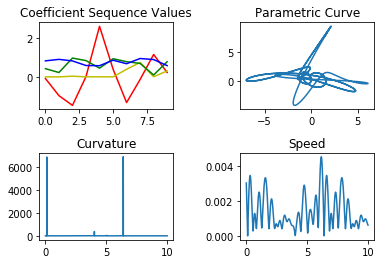

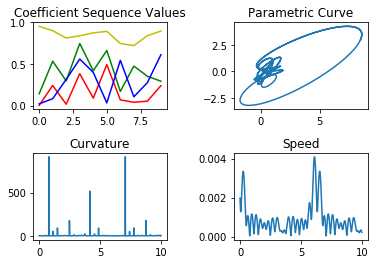

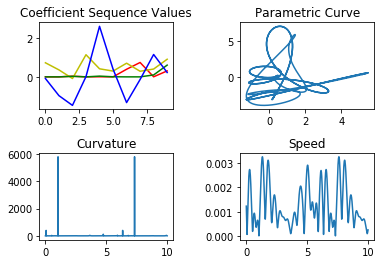

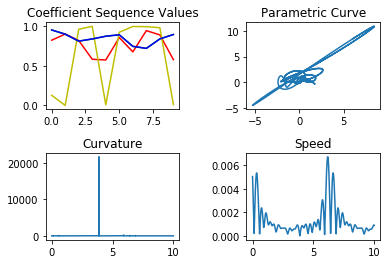

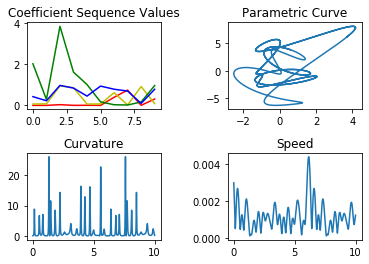

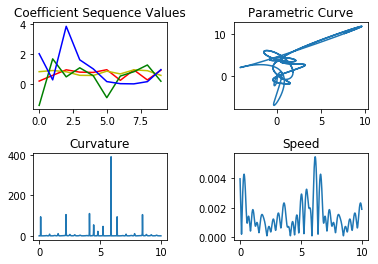

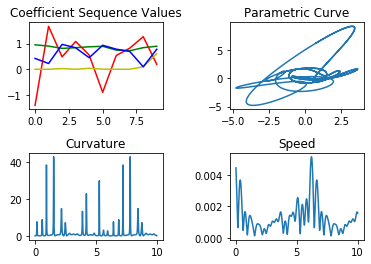

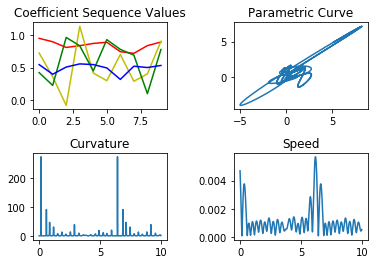

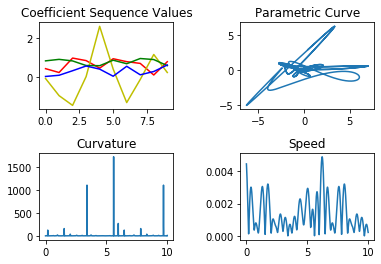

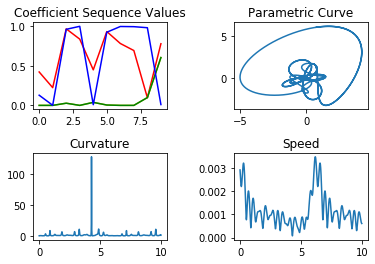

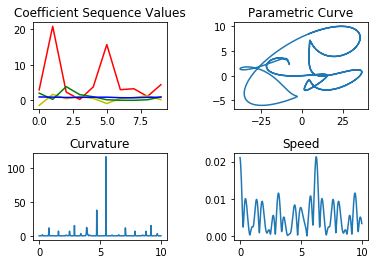

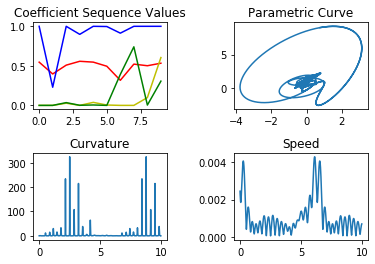

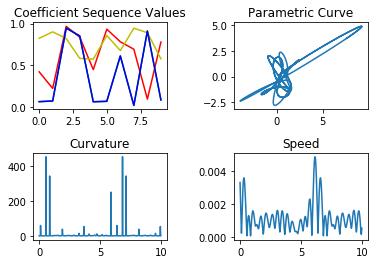

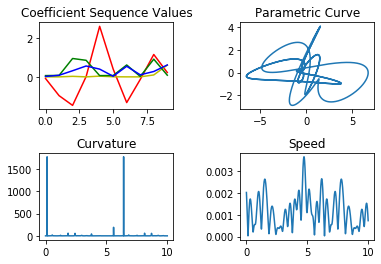

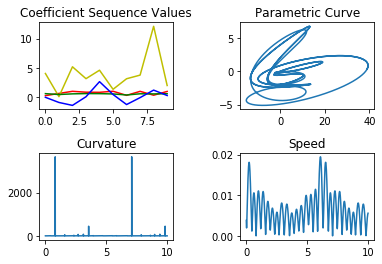

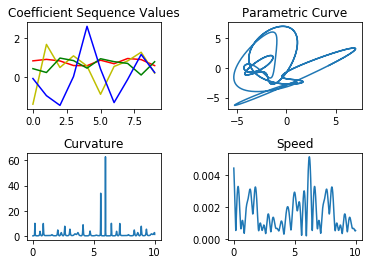

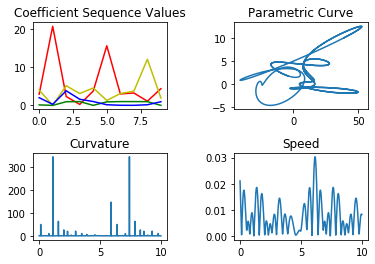

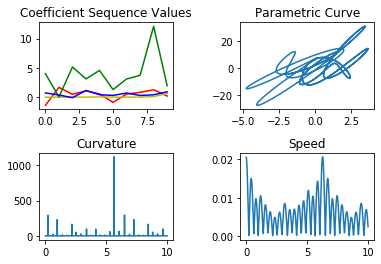

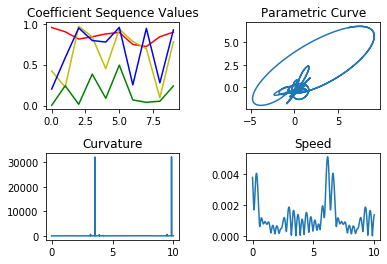

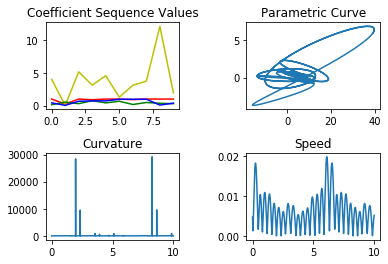

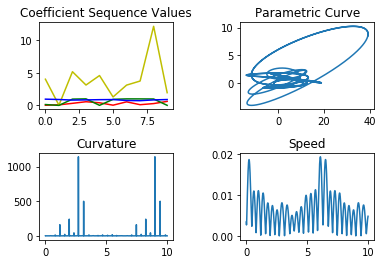

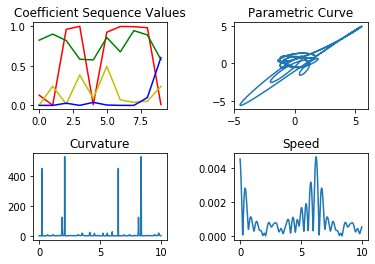

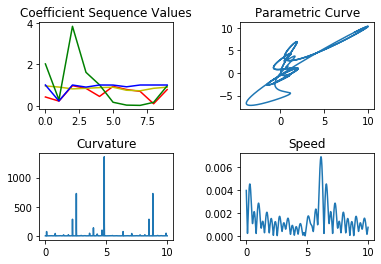

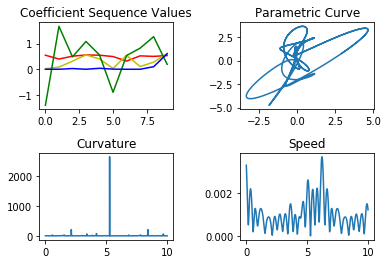

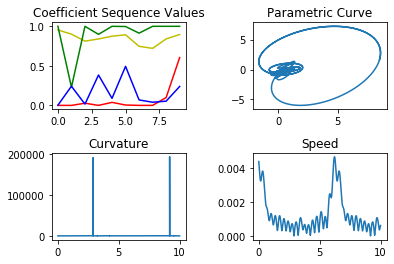

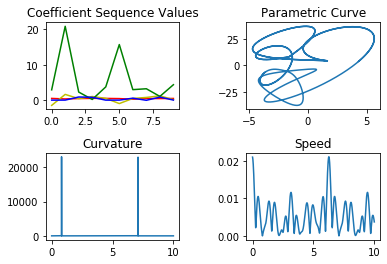

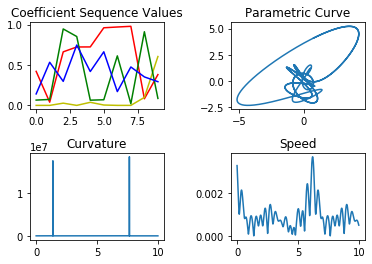

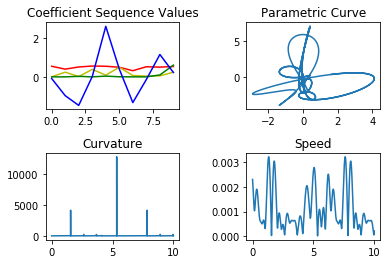

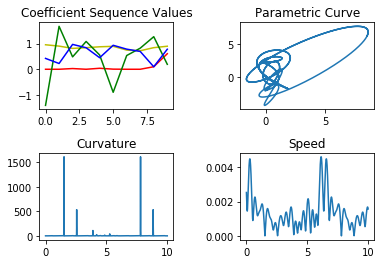

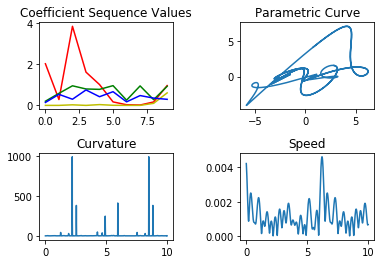

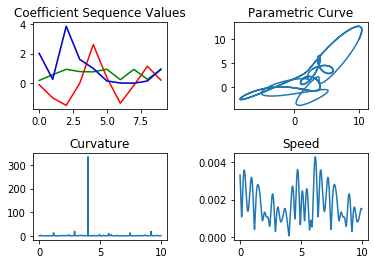

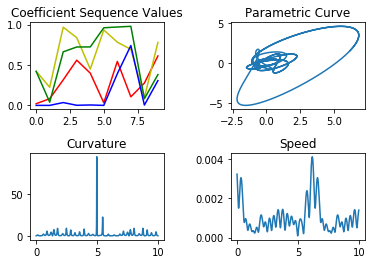

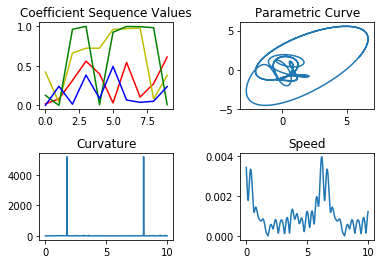

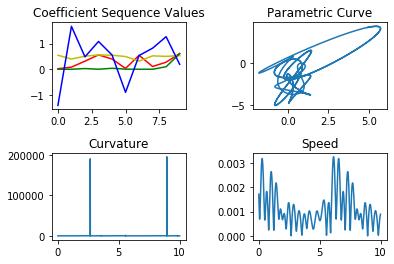

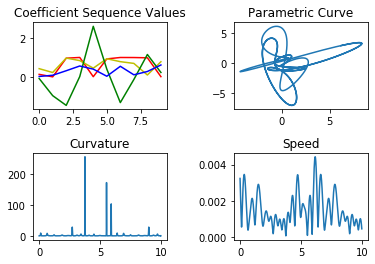

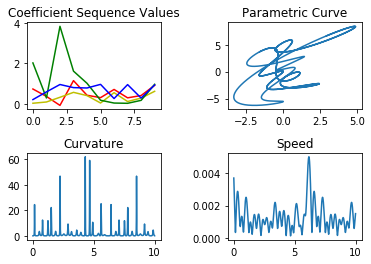

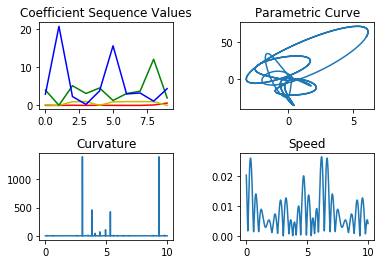

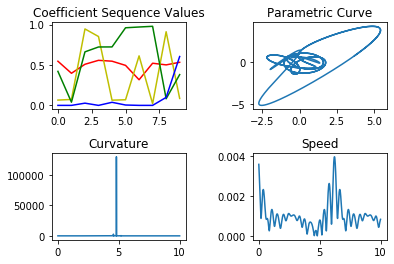

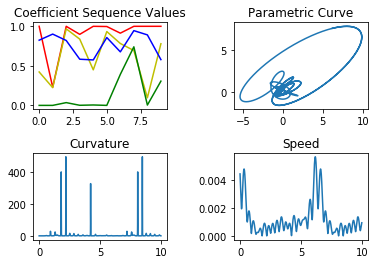

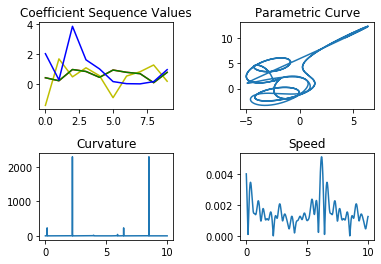

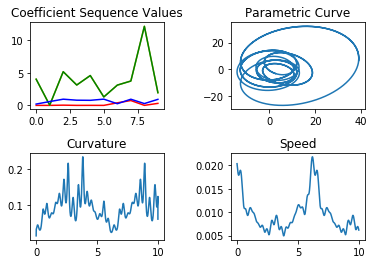

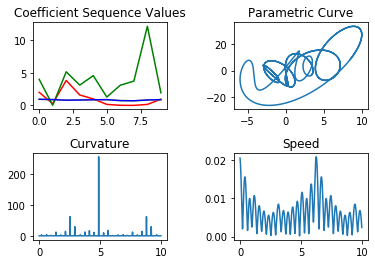

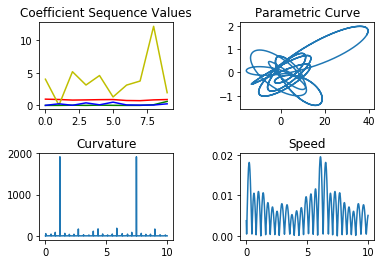

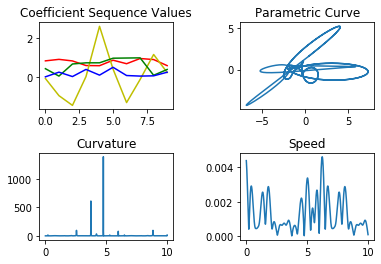

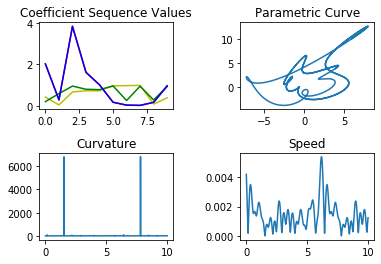

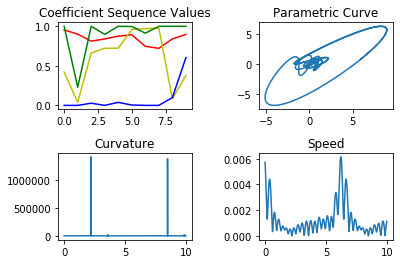

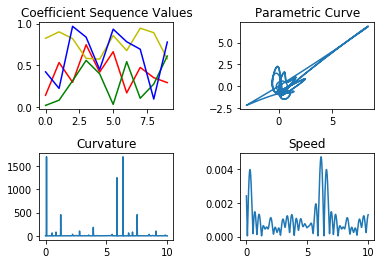

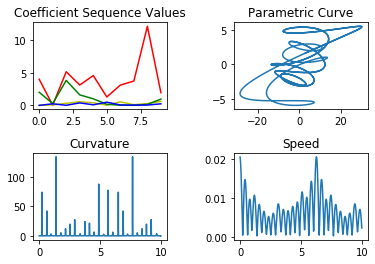

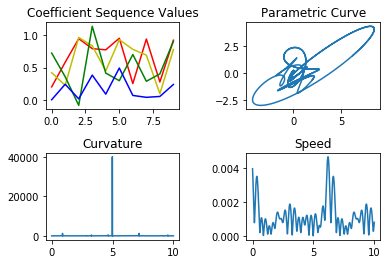

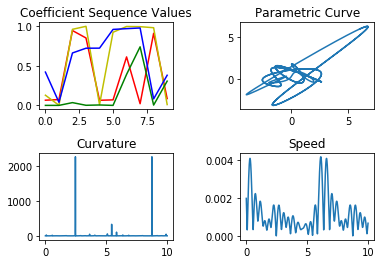

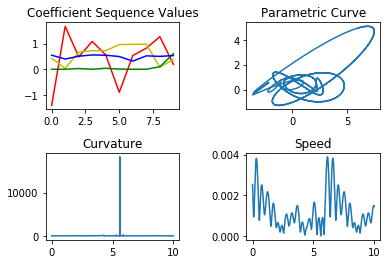

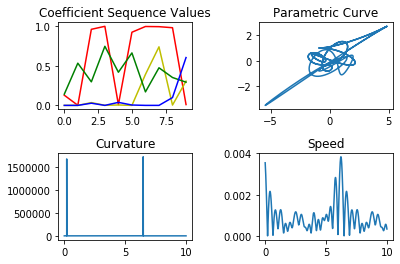

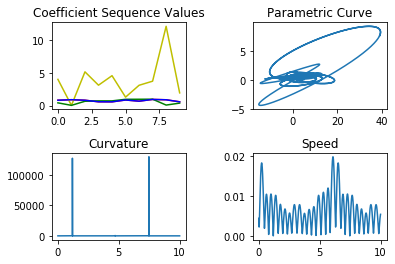

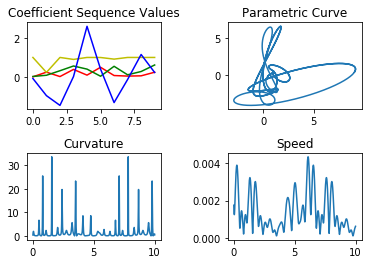

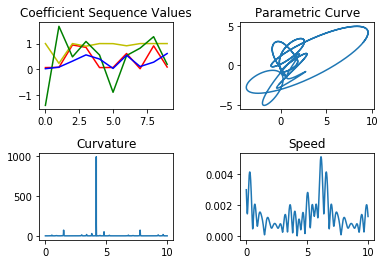

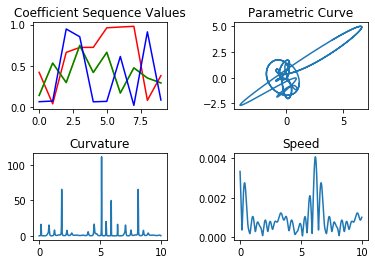

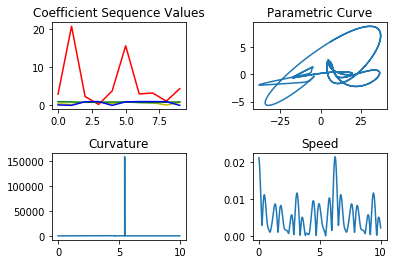

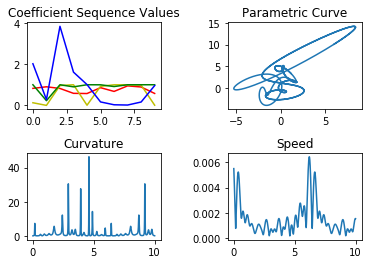

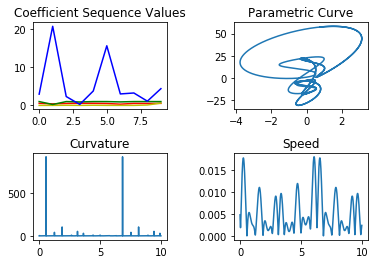

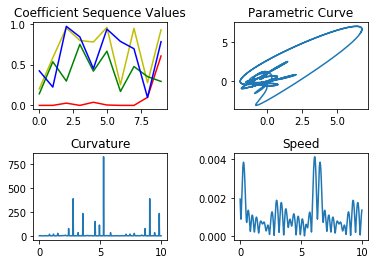

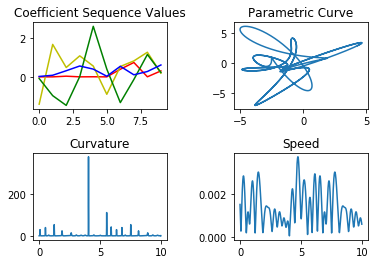

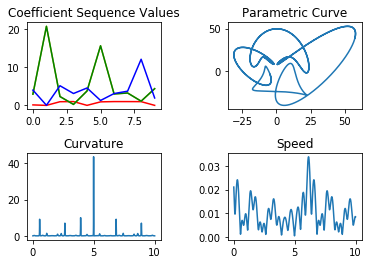

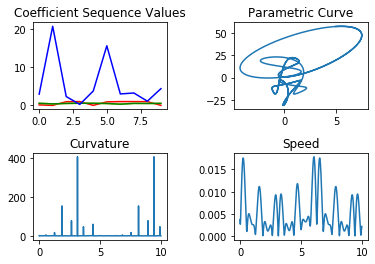

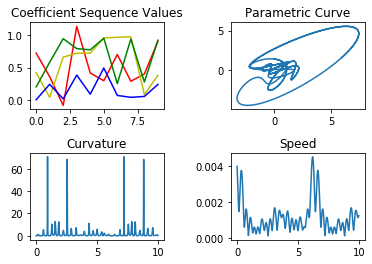

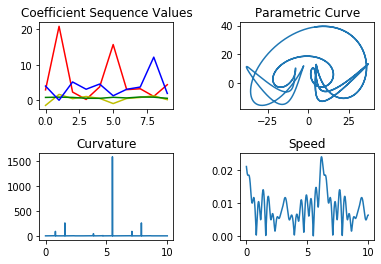

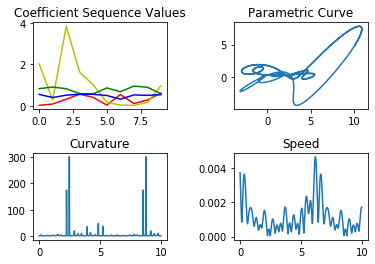

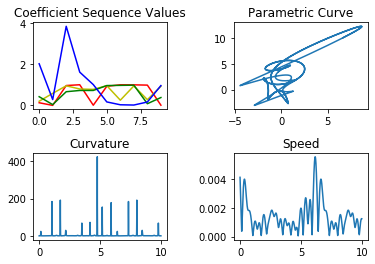

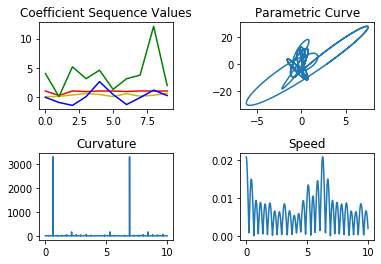

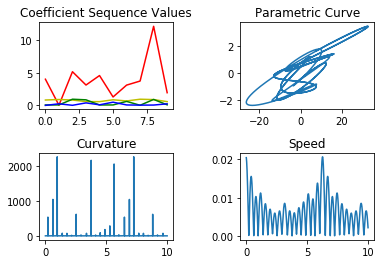

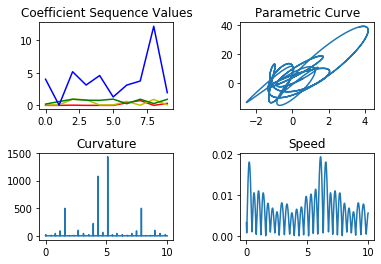

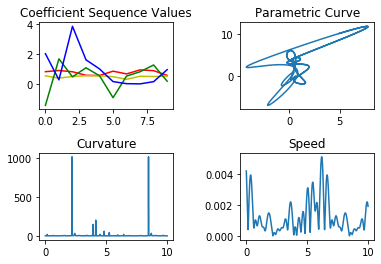

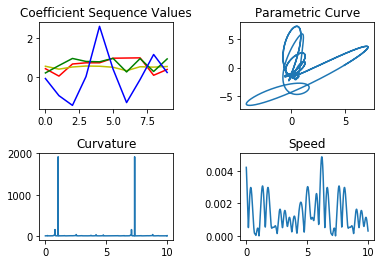

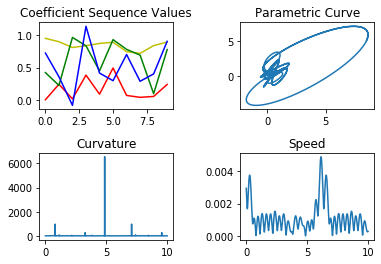

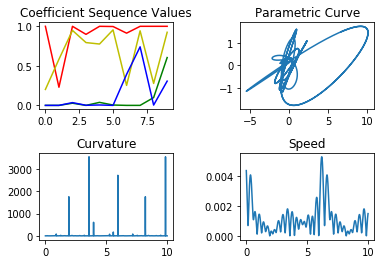

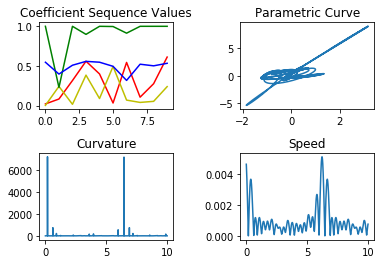

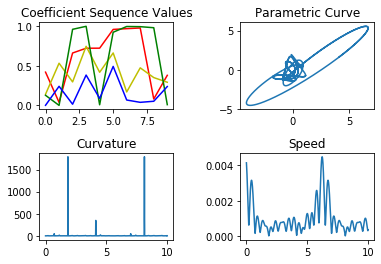

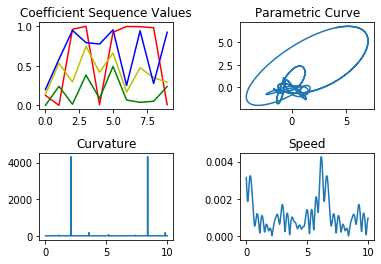

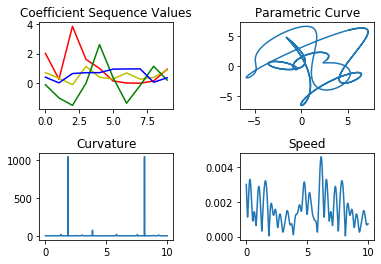

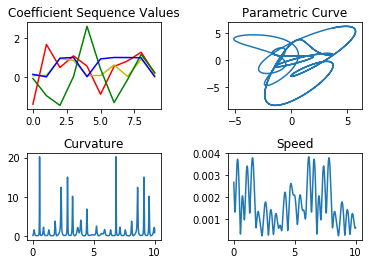

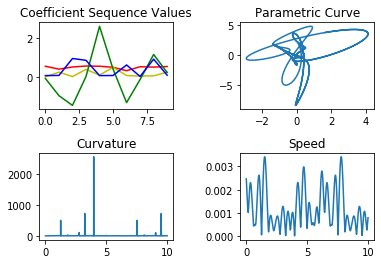

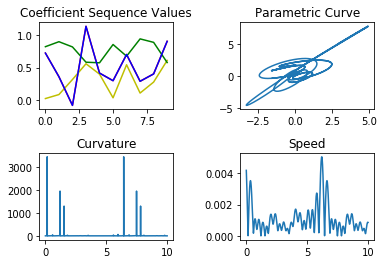

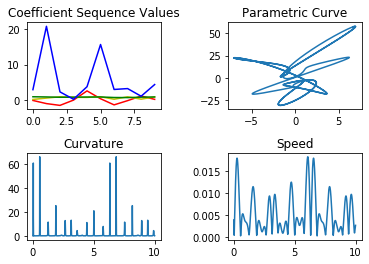

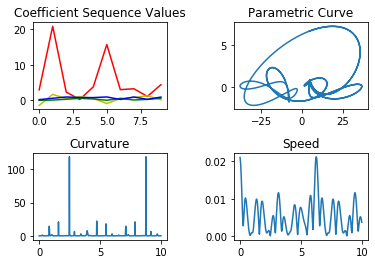

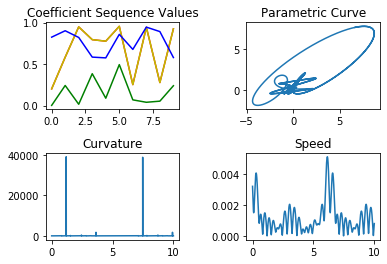

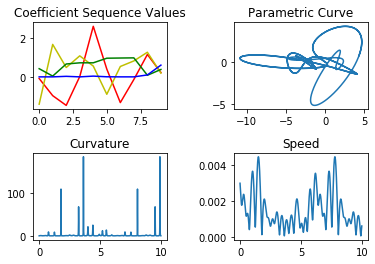

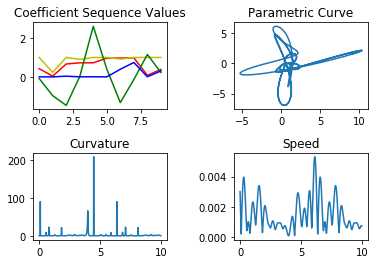

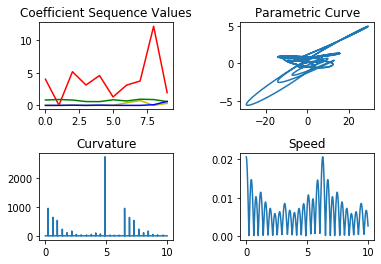

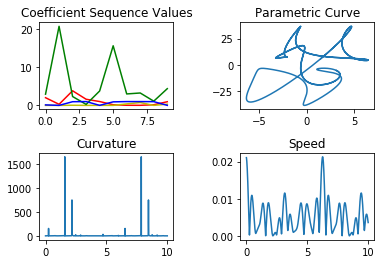

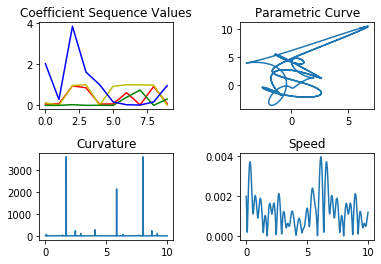

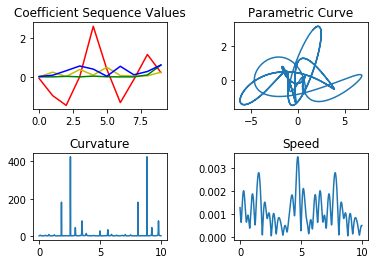

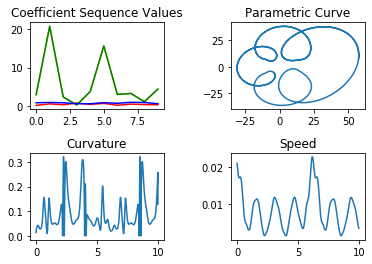

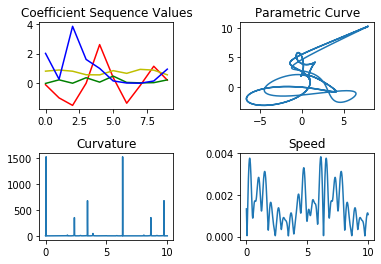

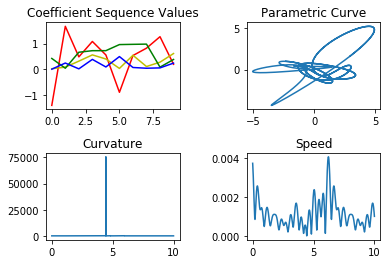

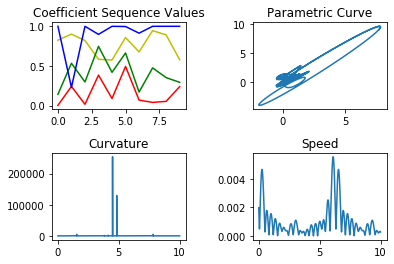

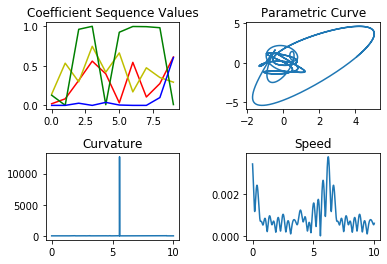

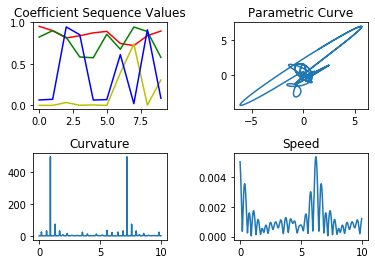

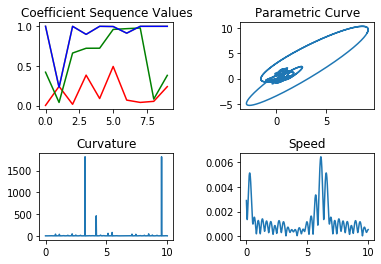

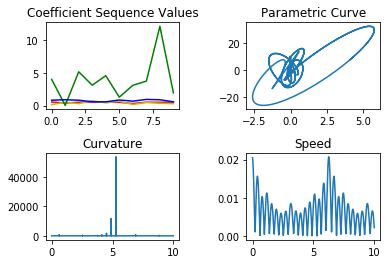

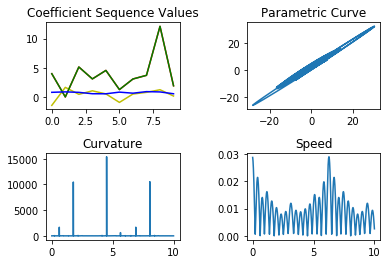

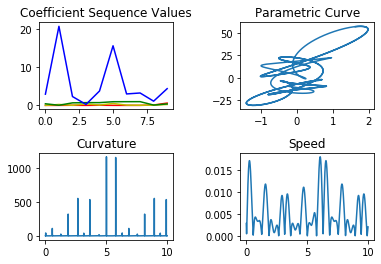

In [194]:
plotNRandomPlots(100)

In [207]:
import csv

indexes = []
for _ in range(4):
    indexes.append(random.randrange(len(allSequences)))

a_k = allSequences[indexes[0]]
b_k = allSequences[indexes[1]]
c_k = allSequences[indexes[2]]
d_k = allSequences[indexes[3]]

x_t = np.round(genTrigFun(a_k, b_k)(TIME_T), RESOLUTION )
y_t = np.round(genTrigFun(c_k, d_k)(TIME_T), RESOLUTION)


with open('curves.csv', mode='w') as csv_file:
    fieldnames = ['Sequence-a', 'Sequence-b', 'Sequence-c', 'Sequence-d', 'x', 'y']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(K):
        writer.writerow({'Sequence-a': a_k[i],'Sequence-b': b_k[i], 'Sequence-c': c_k[i], 'Sequence-d':d_k[i],
                        'x': x_t[i], 'y': y_t[i]})
        
    for i in range(K, len(TIME_T)):
        writer.writerow({'x': x_t[i], 'y': y_t[i]})
        

# 3D version

In [202]:
def speed3d(x_t, y_t, z_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the speed 
    """
    return np.sqrt(np.gradient(x_t)**2 + np.gradient(y_t)**2 + np.gradient(z_t)**2)

def curvature3d(x_t, y_t, z_t):
    """
    Input: 2 arrays of length of TIME_T
    Output: 1 array of length of TIME_T representing the curvature
    """
    # TODO: USE DETERMINANT TO SCALE UP EASIER
    
    num = abs( (np.gradient(y_t)*np.gradient(np.gradient(z_t)) - np.gradient(z_t)*np.gradient(np.gradient(y_t)))
              - (np.gradient(x_t)*np.gradient(np.gradient(z_t)) - np.gradient(z_t)*np.gradient(np.gradient(x_t)))
              + (np.gradient(x_t)*np.gradient(np.gradient(y_t)) - np.gradient(y_t)*np.gradient(np.gradient(x_t))) )
    denom = speed3d(x_t, y_t, z_t) ** 3
    return (num/denom)

def plotAgainstTime3d(f_t, x_t, y_t, z_t):
    plt.plot(TIME_T, f_t(x_t(TIME_T), y_t(TIME_T), z_t(TIME_T)))

In [62]:
# Normal distribution
a_k = np.random.normal(10, 5, K)
b_k = np.random.normal(10, 5, K)
c_k = np.random.normal(10, 5, K)
d_k = np.random.normal(10, 6, K)
e_k = np.random.normal(10, 7, K)
f_k = np.random.normal(10, 5, K)

In [74]:
# Beta distribution
a_k = np.random.beta(0.1, 5, K)
b_k = np.random.beta(0.1, 5, K)
c_k = np.random.beta(0.1, 5, K)
d_k = np.random.beta(0.1, 5, K)
e_k = np.random.beta(0.1, 5, K)
f_k = np.random.beta(0.1, 5, K)

In [72]:
# Gamma distribution
a_k = np.random.gamma(2, 2, K)
b_k = np.random.gamma(2, 2, K)
c_k = np.random.gamma(2, 5, K)
d_k = np.random.gamma(2, 10, K)
e_k = np.random.gamma(2, 2, K)
f_k = np.random.gamma(2, 2, K)

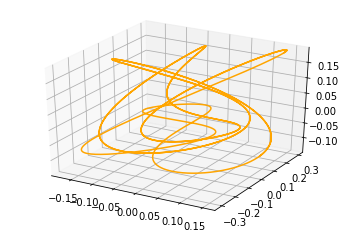

In [75]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = genTrigFun(e_k, f_k)(TIME_T)
xline = genTrigFun(a_k, b_k)(TIME_T)
yline = genTrigFun(c_k, d_k)(TIME_T)
ax.plot3D(xline, yline, zline, 'orange')


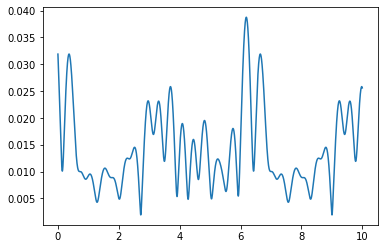

In [32]:
plotAgainstTime3d(speed3d, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k), genTrigFun(e_k, f_k))

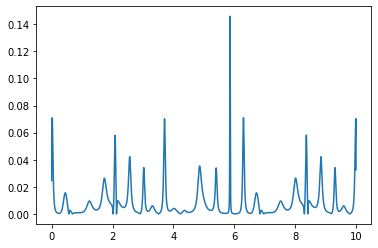

In [14]:
plotAgainstTime3d(curvature3d, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k), genTrigFun(e_k, f_k))

[0, 2, 0, 0.04]

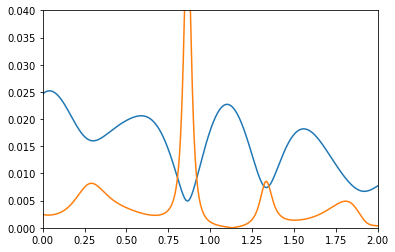

In [29]:
plotAgainstTime3d(speed3d, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k), genTrigFun(e_k, f_k))
plotAgainstTime3d(curvature3d, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k), genTrigFun(e_k, f_k))
plt.axis([0,2,  0, 0.04])

# Different a,b,c,d,e,f sequences

Symmetric 2D curves

In [21]:
a_k = randSeqGen(0,100)
b_k = np.sin(randSeqGen(-100,100))
c_k = np.sin(randSeqGen(-100,100))
d_k = randSeqGen(-100,100)

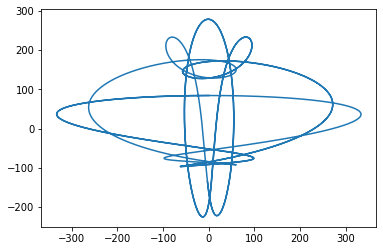

In [22]:
plotParametric(genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))

[0, 2, 0, 0.04]

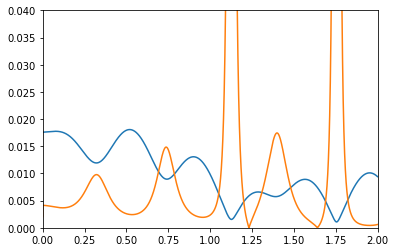

In [26]:
plotAgainstTime(speed, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))
plotAgainstTime(curvature, genTrigFun(a_k, b_k), genTrigFun(c_k, d_k))
plt.axis([0,2,  0, 0.04])

In [40]:
def myPrint(a, num1, num2):
    if a == "b":
        print(a)
    
myPrint("b",2,3)

b
